# Simulating Capillary Rise Using CFD Finite Element Method

Antonio Robali &
Richard Adansi

The University of Texas at El Paso
Fall 2021
CFD



### Abstract 

Capillary action can be thought of as the motion of a fluid through a thin tube. This motion is due to the adhhesive and cohesive forces acting between the liquid and the surface, and the liquid molecules themselves respectively. This effect can cause a fluid to rise against gravity or sink into its ocntainer when exposed to a thin tube depending on the materials and fluids involved. In this paper, we will discuss the various applications of this capillary action from nature to aerospace. We will then briefly discuss some challenges in the field and finally, we will create a Computational Fluid dynamics (CFD) code based on the finite element method to attempt a simple simulation of this effect in two dimensions by setting up a control volume between two walls. We will only be focusing on the diffusion term in the navier-stokes equation for this initial attempt. Future work hopes to include more components of the navier stokes eqation for a more accurate result as well as transient behavior.


### Introduction 

Capillary flow occurs everywhere in nature. The most notable example is in trees where capillary action draws water up a tree's porous bark.[3] Another notable example is within our own bodies where capillary action allows us to breathe by circulating blood through the capillaries in our lungs, exposing them to the oxygen we breathe in and saturating the blood cells for another round trip through our body. 


It is important to note that a capillary does not have to be a simple thin tube or even an array of thin tubes. A porous substrate also experiences this effect. In fact, a porous substrate can be simplified as an array of thin, interconnecting tubes. In the field of aersospace, a particularly important application of capillary flow is in passively fed propulsion systems where porous substrates are used as passive liquid feed systems for various systems such as electrospray thrusters for small satellites. These systems don't have any pumps and therefore, rely completely on capillary rise for propellant flow. This propellant flow therefore controls the emission regime of the thruster and ultimately its performance. [4] Therefore, it is imperative to fully understand capillary flow through porous substrates to accurately estimate the performance of electrospray thrusters. 


To create a CFD simulation, one first has to define a finite volume which is to be divided into discrete control volumes. This is called grid generation. by placing nodal points between our control volume and then placing boundaries midway between each node we subdivide the volume into discrete control volumes with a node at their center. In our case, this is done in two dimensions thus creating cells with four walls and a node at their cnter. It is important to note that the spacing between each node does not have to be equal and the cells do not have to be perfect squares. One can create cells of nearly any geometry with more complicated grid generation schemes. For our purposes, a simple uniform grid will suffice. The two dimensional grid that will be used in this code resembles the following figure. 
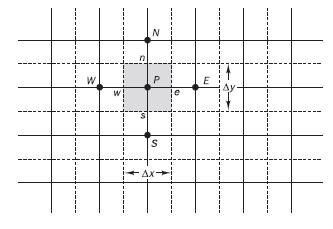$\tag (Figure-1.$

After grid generation is complete, discretization is the next step. This is the key to the finite volume method. By integrating the governing equations over our control volume, we arrive at discretized equations for each of our nodal points. These discretized equations basically form a balance of diffusive flux,  $\phi$, for each discrete volume in the grid. Where $\phi$ can represent any arbitrary conserved property of a system. 

### Problem Statement

The two-dimensional steady state diffusion equation is as follows:
$$ \dfrac{\partial}{\partial x} \biggl(\Gamma \dfrac{\partial \phi}{\partial x}\biggr) + \dfrac{\partial}{\partial y} \biggl(\Gamma \dfrac{\partial \phi}{\partial y}\biggr) + S_{\phi}=0 \tag 1$$

Consider a thin tube with a width of 1 mm and a height of 10 cm, this tube is symmetric about its central axis and therefore can be simplified as a rectangular area of the same dimensions. A thickness of 1 mm is given to this surface to create a volume we can simulate. 
We assume there is an infiite pool of liquid at the southern boundary of our control volume and a meniscus has just formed in the liquid. This will be the inlet of our control volume. The outlet will be the northern boundary of the control volume and the driving force will be the surface tension of the fluid within the interior cells and surface adhesion and the west and east boundaries. 




### Methodology (1 pg.)

In 2-D, the governing equations are as follows: 

$$ \dfrac{\partial}{\partial x} \biggl(\mu \dfrac{\partial \phi}{\partial x}\biggr) + \dfrac{\partial}{\partial y} \biggl(\mu \dfrac{\partial \phi}{\partial y}\biggr) + S_{\phi}=0 \tag 2$$

Where $\mu$ is the surface tension of the fluid in question. This is taken to be a contant in this case. 

Integrating over the control volume yields

$$ \biggl[\mu_e A_e \biggl(\dfrac{\partial \hat{\mu}}{\partial x}\biggr)_e-\mu_w A_w \biggl(\dfrac{\partial \hat{\mu}}{\partial x}\biggr)_w \biggr]+\biggl[\mu_n A_n \biggl(\dfrac{\partial \hat{\mu}}{\partial y}\biggr)_n-\mu_s A_s \biggl(\dfrac{\partial \hat{\mu}}{\partial y}\biggr)_s\biggl]+\overline S\Delta V=0 \tag 3$$ 

Where A is the cross sectoinal area of each respective face of each cell at the boundary using cardinal directions as shown in Figure 1. 

Since $\mu$ is taken to be a constant in this case and our mesh size is uniform, we can collect all fluid velocity terms $\hat{\mu}$ on the right side of the equation yileding the following discretized equation. 
 $$ \biggl(\mu \biggl(\frac{A_w}{\Delta x}+\frac{A_e}{\Delta x}+\frac{A_n}{\Delta y} +\frac{A_s}{\Delta y} \biggr) - S_p \biggr)\hat{\mu}_p= \mu \biggl(\frac{A_w}{\Delta x}\hat{\mu}_w+\frac{A_e}{\Delta x}\hat{\mu}_e+\frac{A_n}{\Delta y}\hat{\mu}_n+\frac{A_s}{\Delta y}\hat{\mu}_s \biggr)+S_u \tag 4 $$


Put section of different methods of solving. Branch complex problem methodology into simplification on results as part of your conclusion. 


### Results
A code was created in python following example 4.4 from [1] which uses the finite volume method for two-dimensional diffusion problems. This was then modified to be in terms of kinematic viscosity and fluid velocity. 

We begin by importing matplotlib.pyplot, numpy, and json. These libraries will help us solve our discretized equations over our geometry and graphically plot our results. We then define our geomtry discretization terms Lx, Ly, n, and m. Lx is the size of our geomtry in question in the x direction, and Ly in the y direction. n and m are the amount of divisions in the x and y respectively. dx is therefore Lx/n and similarly dy is y/m. We define dz as .05 for all cells. We use these values to create vectors x and y with size n and and m, then we use these vectors to create matrix [X,Y]. This will be our mesh. We then initialize our solution with zeroes and apply a series of loops to iterate our equations over our mesh. These loops are used to apply the correct boundary conditions to our geomtry at any of the walls or interior nodes. Finally, a solution mesh [A,B] is generated  and solved using the numpy linalg.solve command.  We then use matplotlib to plot our solution. The code described here is shown below and is part of this python notebook. 



### Conclusion
Although initial simulation results were gathered, by only modeling diffusion, we are neglecting several factors that may alter the result of the simulaiton such as gravity and time. The ultimate goal of this project is to create an accurate simulation of a fluid flowing into an arbitrary porous substrate geometry. For that, a more complicated meshing scheme will be necessary to be able to accept arbitrary CAD files and generate cells and nodes. Furthermore, gravity and time must be accounted for in order to find the non-trivial time till saturation of the porous substrates. Therefore, this project will continue to be updated and be availabe on Github until all goals are reached. 

### References

[1] Kumar, V. (2021). Fundamentals of Computational Fluid Dynamics. The University of Texas El Paso. Deptartment of Mechanical Engineering.

[2] Versteeg, H. K., &amp; Malalasekera, W. (2007). An introduction to computational fluid dynamics: The Finite Volume Approach (Second). Prentice Hall. 

[3] Capillary Action. (2020, August 15). https://chem.libretexts.org/@go/page/1500

[4] Kristinsson, B. O. (2017). On the Design of Electrospray EMitters and their Microfluidic Behavior. Massachussetts Institute of Technology.


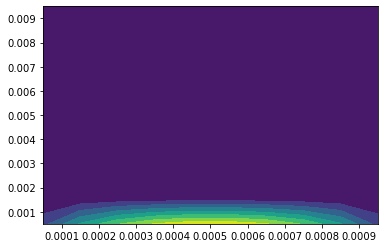

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import json

Lx=.001; Ly=0.01; n = 10; m = 10; nn=n*m; # Geom descretization/mesh


# Properties
Ua=0; Ub=0; Uc=1; Ud=0; # BCs
u=.072; G=u;  

 
dx = Lx/n;  dy = Ly/m;  dz=.05;  
x = np.linspace(dx/2,Lx-dx/2,n); y = np.linspace(dy/2,Ly-dy/2,m); [X, Y]=np.meshgrid(x,y); 

A=np.zeros([nn,nn]); b=np.zeros([nn]); d2=np.zeros([m,n])


for j in range(m): 
     for i in range(n): 
       
        P = j*n+i; 
        W = P-1; 
        E = P+1; 
        N=P+n; 
        S=P-n; 
        
        Aw = dy*dz; 
        Ae=Aw; 
        An=dx*dz; 
        As = An; 
        Su=0; 
        Sp=0; 
        
        aW = Aw*G/dx; 
        aE = Ae*G/dx; 
        aN = An*G/dy; 
        aS = As*G/dy; 

        if(i>0): 
            A[P,W]=-aW; 
        else: 
            aW=0; Sp=Sp-2*G*Aw/dx; Su=Su + 2*G*Aw/dx*Ua; 
        
        
        if(i<n-1): 
            A[P,E]=-aE; 
        else:
            aE=0; Sp=Sp-2*G*Ae/dx; Su=Su + 2*G*Ae/dx*Ub; 
        
        
        if(j>0): 
            A[P,S]=-aS; 
        else:
            aS=0; Sp=Sp-2*G*As/dy; Su=Su + 2*G*As/dy*Uc; 
       

        if(j<m-1): 
            A[P,N]=-aN; 
        else:
            aN=0; Sp=Sp-2*G*An/dy; Su=Su + 2*G*An/dy*Ud; 
        
       
        aP = aW + aE + aS + aN - Sp; 
        A[P,P] = aP; 
        b[P]=Su; 

d=np.linalg.solve(A,b);  

for j in range(m):
    for i in range(n):
        IN=j*n+i; d2[j,i]=d[IN];
        
fig = plt.figure()
plt.contourf(X, Y, d2)
plt.show()
